In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import keras
from keras.models import Sequential
import keras.backend as K
from keras.layers import Lambda
from keras.applications import mobilenet, resnet50 #, vgg16, inception_v3, resnet50, 
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, History

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

C:\ProgramData\Miniconda3\envs\keras\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
lrReduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30, verbose=1, min_lr=1e-6)

In [4]:
input_shape = (200,200,3)

In [5]:
xxx = np.load("data/xxx.npy")
yyy = np.load("data/yyy.npy")
xxx.shape, yyy.shape, xxx.min(), xxx.max()

((16, 200, 200, 3), (16, 2), 0.0, 1.0)

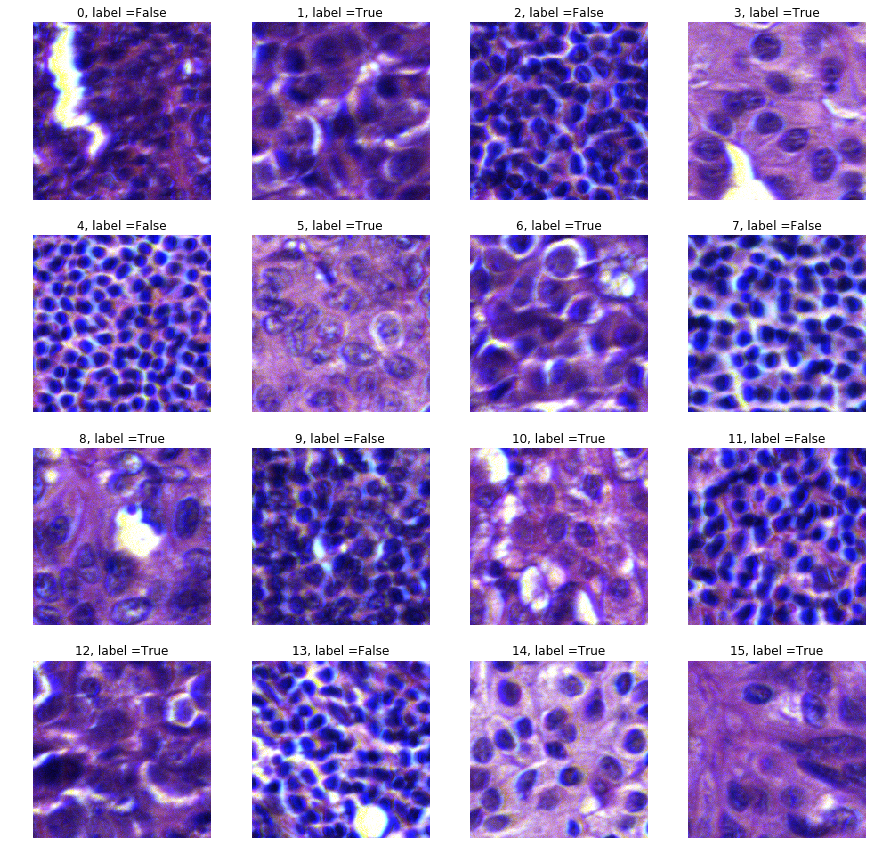

In [14]:
plt.figure(figsize=(15, 15))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, 4*i+j+1)
        plt.imshow(xxx[4*i+j])
        plt.axis('off')
        plt.title(f"{4*i+j}, label =" + str(yyy.astype(bool)[4*i+j, 1]))

In [7]:
mobilenet_model = mobilenet.MobileNet(include_top=True, weights=None, input_shape=xxx[0].shape, classes=2, dropout=0.0)
optimizer = SGD(lr=1e-3)
mobilenet_model.compile(loss="binary_crossentropy", optimizer=optimizer)

In [8]:
mobilenet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 202, 202, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 100, 100, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 100, 100, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 100, 100, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 102, 102, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)      288       
__________

In [9]:
mobilenet_model.fit(xxx, yyy, epochs=100, callbacks=[lrReduce], validation_data=(xxx, yyy), shuffle=False)

Train on 16 samples, validate on 16 samples
Epoch 1/100
16/16 [==============================] - 10s 603ms/step - loss: 0.7440 - val_loss: 0.7781
Epoch 2/100
16/16 [==============================] - 1s 37ms/step - loss: 0.7120 - val_loss: 0.7353
Epoch 3/100
16/16 [==============================] - 1s 37ms/step - loss: 0.6820 - val_loss: 0.6997
Epoch 4/100
16/16 [==============================] - 1s 38ms/step - loss: 0.6958 - val_loss: 0.7259
Epoch 5/100
16/16 [==============================] - 1s 39ms/step - loss: 0.6819 - val_loss: 0.7103
Epoch 6/100
16/16 [==============================] - 1s 36ms/step - loss: 0.6545 - val_loss: 0.7367
Epoch 7/100
16/16 [==============================] - 1s 39ms/step - loss: 0.6482 - val_loss: 0.7501
Epoch 8/100
16/16 [==============================] - 1s 38ms/step - loss: 0.6669 - val_loss: 0.7425
Epoch 9/100
16/16 [==============================] - 1s 37ms/step - loss: 0.6286 - val_loss: 0.7421
Epoch 10/100
16/16 [==============================] - 

Epoch 82/100
16/16 [==============================] - 1s 39ms/step - loss: 0.0406 - val_loss: 0.3677
Epoch 83/100
16/16 [==============================] - 1s 39ms/step - loss: 0.0392 - val_loss: 0.3275
Epoch 84/100
16/16 [==============================] - 1s 40ms/step - loss: 0.0380 - val_loss: 0.3497
Epoch 85/100
16/16 [==============================] - 1s 40ms/step - loss: 0.0439 - val_loss: 0.2945
Epoch 86/100
16/16 [==============================] - 1s 40ms/step - loss: 0.0419 - val_loss: 0.3208
Epoch 87/100
16/16 [==============================] - 1s 40ms/step - loss: 0.0328 - val_loss: 0.2994
Epoch 88/100
16/16 [==============================] - 1s 39ms/step - loss: 0.0294 - val_loss: 0.3236
Epoch 89/100
16/16 [==============================] - 1s 38ms/step - loss: 0.0270 - val_loss: 0.2926
Epoch 90/100
16/16 [==============================] - 1s 38ms/step - loss: 0.0250 - val_loss: 0.2806
Epoch 91/100
16/16 [==============================] - 1s 40ms/step - loss: 0.0223 - val_los

In [13]:
mobilenet_model.evaluate(xxx, yyy)

16/16 [==============================] - 0s 9ms/step


0.25175800919532776

In [10]:
y_real = yyy.argmax(axis=1)
y_pred = mobilenet_model.predict(xxx).argmax(axis=1)

In [16]:
print((y_real==y_pred).sum()/y_real.shape[0])
y_real, y_pred

1.0


(array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64),
 array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64))